Algoritmos

In [ ]:
#to do
def Naive(T,S):  
  M = len(S)
  N = len(T)

  if M == 0:
    return True
  
  for i in range(N-M+1):
    j = 0
    while j < M and T[i+j] == S[j]:
      j = j + 1
    if j == M:
      return True
  
  return False

#to do
def KMP(T,S):
  M = len(S)
  N = len(T)

  if M == 0:
    return True

  def createTable(S):
    M = len(S)
    i = 0
    j = 1
    table = ['']*M
    table[0] = 0

    while j < M:
      if S[i] == S[j]:
        table[j] = i + 1
        i = i + 1
        j = j + 1
      elif i == 0:
        table[j] = 0
        j = j + 1
      else:
        i = table[i-1]
    
    return table
  
  table = createTable(S)

  i = 0
  j = 0
  while i < N:
    while S[j] == T[i]:
      #print(f"i={i}, j={j}, S={S[0:j]+'-'+S[j]+'-'+S[j+1:]}, T={T[0:i]+'-'+T[i]+'-'+T[i+1:]}") 
      i = i + 1
      j = j + 1
      if j == M:
        return True
    while S[j] != T[i]:
      #print(f"i={i}, j={j}, S={S[0:j]+'-'+S[j]+'-'+S[j+1:]}, T={T[0:i]+'-'+T[i]+'-'+T[i+1:]}") 
      if j > 0:
        j = table[j-1]
      else:
        i = i + 1
  
  return False
  
#to do
def BMH(T, S):
  M = len(S)
  N = len(T)

  if M == 0:
    return True
  
  def createTable(S):
    table = dict()
    table[S[len(S) - 1]] = len(S)
    for i in range(len(S)-1):
      table[S[i]] = len(S) - i - 1
    table[''] = len(S)

    return table

  table = createTable(S)
  print(table)

  t = M - 1
  while t < N:
    i = t
    j = M - 1
    
    print(f"i={i}, j={j}, S={S[0:j]+'-'+S[j]+'-'+S[j+1:]}, T={T[0:i]+'-'+T[i]+'-'+T[i+1:]}") 
    while j >= 0 and T[i] == S[j]:
      j = j - 1
      i = i - 1
    
    if j == -1:
      return True
    if T[t] in table:
      t = t + table[T[t]]
    else:
      t = t + table['']
  
  return False


In [ ]:
T = "aAbc"
S = "aAbc"

assert True == Naive(T,S)
assert True == KMP(T,S)
assert True == BMH(T,S)

#A pedido do professor
T = "nabjcwababaidcjab"
S = "abaid"

assert True == Naive(T,S)
assert True == KMP(T,S)
assert True == BMH(T,S)

{'c': 4, 'a': 3, 'A': 2, 'b': 1, '': 4}
i=3, j=3, S=aAb-c-, T=aAb-c-
{'d': 5, 'a': 2, 'b': 3, 'i': 1, '': 5}
i=4, j=4, S=abai-d-, T=nabj-c-wababaidcjab
i=9, j=4, S=abai-d-, T=nabjcwaba-b-aidcjab
i=12, j=4, S=abai-d-, T=nabjcwababai-d-cjab


In [ ]:
T = "BCBADBDADBADBDSDE"
S = "BADBDAD"

assert True == Naive(T,S)
assert True == KMP(T,S)
assert True == BMH(T,S)

T = "HAdcuNQyDGzPzeIeJpALlNwgeRWchoQxzolstIXkTgghWkzrEixBJxIDyzdrSsfCiZUaOCsmFpBgdbfaIbcibwDZJkDgMtmyhWhsFMDrfpHuMQfdIAbszIorDePzovVffQeQhUHEwuZKmkzSfBB-Çç@##uzBBXldFRHeVxUCobbyVASjQrJOzsQWQcvqHTYeZhKRcUaDVDKZfxeNMFeHWkWCusCWoHOrpTdPgVZxERyesuCACbsSWZwIVHoVcEVbtMtDtZCahMRklTnvpjTFCUdQMtSAzGvzZeHGrLzuXojULejdDIMfNIcwYjMeJcvqxbrZfPavoRQKCEcUzdplKMiviJEuzNRHrnIiileGNVOesvuYkNfczvdTdJpLsaQAMbhgqVZZiuKladhpfaNiDgFoZzjSiBbkEDhLqKiMXrezkutniUdZdfokPICiVbIBzENLMTuTDBVtiywXLGxQmAlwMVCcEfvYmJletYGwChWAPmcPuPLvaNOFSFvqfjVNnrEpLnEGwBwjdVdJqbkGxxTCStvqNblWRbgFowgcWKzpIGaOjGOOJiNjesRlWFgGEmuoVmlDgahDWdNcXAqLxaFituQrfBBBhuaqXxQlBFCiyybJveMLjHrQcUldkLIocVOZspvsCwyWQhJHJNaoQOZxjNjGibKkLSvxDdrkmmCPzQkwtHRsmeYiKJJUSRiHPpRoQXxDcUIdtAEomPikLavdFrHhkJiYrfgcHlArMTzLXFmmoiHkJuJEobuiukkYKDfamPpVxTwPrlxFVWSgwxMqnqGqoHJJWphXwTmWHyijWQjHYcxMgZOTkSbtXmnQqhmOJJVQhMjEQwYMhzHYGYvrpbCLgjCzRgIphYRzfXQbmdPIqyXDXpoEKqKsqKEywJVvfpAeKwnEqGFgFpcjgwYlJtzkanfsDaLzkHIPLjWFgmpXThAAtnPSrYwIoSVRjBMuXltMkNRJCYQgovnaCDCDDrKQSWdXElFqRrRNdnOutPmZYPJXtGAQknEVGwrkxvRqEyYwtwtDzePvZmDhCNZMbcVSoQdcoCrViucrtYyqwAMbVXIGUgseTIufxgQgYypSYhCoThWgPeeJKiRuxMUSxSxnndRxAUUwhSkNXPKszMkVGKlwuelFiRtubLwnUNekrFnsgmemzZDWQlUFyosnJFoMnLgVtNBIYCvCCNcaAGWPPyHXsLkvTcXvCiDSsmFVveqimCfHldYyvMYOzFlmOnZodkTYZlAWHyANyXBkpHhqFtJRxsMFPzVTbtezvHrrxMYiFaLgmTqKpuXiXYXnLGqISuRtIKkEdDTbpHSbXHdkvuAAeIukuIVyYkLmohmCaHielncjsSYYWUEiWTKrtcjaDBeDuRBpnegQLtoRWYCDZTylLAoWDGAXIUxVHIrmIfBqplgDkMbcKuKOgNHtGjREuYbeCyByoZAqvAXwBCNBshZVZocXwkRKktkNYggNYeYvCfLcryKpOEIPPmBBJuIKEzKxaXapLolsBFAkxBLYkfujgShNvnHiyxqdUHAhbBiABNJsqeRmDYNZllTIaMBNADYTlHqlsuSGdxjUzqmVIRiMHOWwKxudiNYkwauhKamYIfXbdDnvGAoSsKwmpbUBDAcCRIfdHydjgBowupiHVNxlnAYfIbQEXcxoWLgLPXPFmBrAOTpmDIjIHnRweLLPmeArPMbWRVuZwmRilzxOJYtuAhGOVmCrhjaAwFEfvcGQzJShsHusnICzJNGrYvTGMJujNMtrKJILwxqNJVmqlPsutgkRafCIKjSKRSDuAWOfyPFQUFYuRQPpOuqCSltNnLXaxaVOUIqeqvNDVsDPfCKcYMhpGBykwfCOLthjFHaSIamKzmUxAyWVTAGawloprxRcLSZfIUpNGFhFgjUREZURnPHlRwYKHYXFlxDAjkSxuNVGVVeVnHsNebbkfwryxdptSyRcNwHtFTwQVktGJLTasFPWqhMeRZLUTojfzJUqzWfXGCOdTQNVtLWulNwpIJQxzmVyOsdRUNFxxoPTjkzbzdcGWbJEJXiJGMWHDkYVeiQNiTpsyRaZuUuQHcsKvnXprlGOiVdmkGEveRYzPjgLvdIiTDGlCAeCxNkJJbQIGeRtGSYCyQGkmpdTcrYJNgbOqeNFYhLQuhKAslMdvOnqlNKQnySUErlUYkbLSqUOIvHKdmNdMAPMBquwoOwXRUmnkcpGwhQgdDAbUQpgdrvnWOzyyDcXgQKOAgpbwAQohktfYmGvlhEXpDslxoIHSQfBHQnRbABSFaAyTytSmtYxlVmIgVjZokqwevMvgkvhorpWehEUKxSuCSaFJEHSgOdELbqUQJmFRMaTIlrJgPIFFYCrAYDPdVfqyDCxNvfNAbblUJNASNrxdiUCDkUDNiDXIxULklmPVqHJxWznwtZtfRUBitSNRasbpArHifkQOyXVYijgSJAoeMQexedACzyIFmOTttkfHISMKmaEiqWZTPRQyMyxVKVtFuqkXYNCvQudvPPbQdoNHpWueQsslaWUNZuYyJiYxFxJURzlGmIhqgIYllAUWHaNYaAKsSIdryskJLkvIOIIcWGHtUjkmTuNbrxtTGkfgiZTlDYGfbarCWDRMzrVuXwYwCTrpIeGatarhHFqzKPSvsePFKKUYOYxojQZSeJxgBqmabuNAYJBrpXjBEHaazokXFkRlGXTAfCfsgibAyZOYAKwDBgrkVGzdyEouijQzQNGBjzkHXgcYpQVQZLqGLStrhjLEshYWBFxbQZijGSHpJDopxiTsRFXEDegREWliMDtZDdOaDBecWuqEKZckTUTeqakUIjWVTyxRlcrUrwGhiRXaUCFQsCBUcRlJHZznImbVLFBZQZPBtgXWBDjPHHtozAUpMPkQIeEqxJcYBCqWpyQYWnGzmcNeDMKeByfcfJkYpGgxWaPGqQZYUMFtHcUzbURfCvCmQcLwMUJKVmCBRPFMlWXSeNiOzZNfcRrGtOEkbnECkvOrSCRbOJJFENZMYKFQcBJDJPdGCyohjwxOOTXgBhesTVgEWJGBcCoajCtGfsduqFFOIVfrgSGzonPZrWCyEmRXePBXuPKecaTSOoRYdcIzSvNfbUpZHZQRRbrumVlqQcCRWdBOAIBgcuzsjWQaZFkFtjXeVSRqmCMBxeCqDYxdGCDwqbUjCfHxpTQYvhiTYCFvXCyddZlmvTXzgsMrtaCjQjBuruuiMqwyNTwDrsQpYqhoWDOpJvwcuOSpsOaOAnWBlYuECamJWHOGSipKyeFPuaxtqyOjnVuODfXxvqoCfVtMytIpBCiWDaxFJgNYKfjJmYOZSbPmtQKmPaqOxnYkIjsDVCzRJLVCXcRlpPkxBtsZYlqlbkBvcsAVnmstGnfULaXfXcxzqDguhePWZEmyFRbWyvjyiLlCbVVcKrUDIZRGUegyKjPvtkRxwXjKnjjEEWenPJPYLEJOZSWYfzWVTQCrSJDnERGrGlJkJqKWmEcekhDZrmKiSLGPqywUjfgvFZehoNKprmUjfeeFrlbTXkbCNtWqXoRDhGcQRcxHdioIDJtTirluKaQmNmcbXduQsKHgIccuRuaJBhebEruxaQtiNZheaYTgKpilABIGCopVNmkSLiIYypsJSUAwvrgUwYMQTydDspOHApQYgpHAytqXeoSUJzddCMFdpeMpVCpjsQjnPnaIwxhBJHXTZoeNucIIEbYvzEoiVPNqGTXZNbdaiFlpxKMmdLZPeHUVqlCIAMTjivtfhgPHmdjcVweiZhYIAknyEksKCblUtZoyDyfQDQAyyqxifaJMEqiuzaElErXXZirfKMwPAaDEMULytFbrFyRwqaxzxbOXlEnTPqtCrERqOYRbxXCedlPgXXnWFPNUcTqnILLKXgRLlpBKRqAYbxxmEtJTIQrVtUtVWOZZAbNKXzUGiqyvCmHbSHNxBXtmlmEtBMORUHRzfBoyWmOYdyVTYnOInqHRxmmZMtTrDkDWWnyrKNTKaHOdfRztUhOnd"
S = "vVffQeQhUHEwuZKmkzSfBB-"

assert True == Naive(T,S)
assert True == KMP(T,S)
assert True == BMH(T,S)

T = "HijshIsiojshidsugd´D9d8Dd98dd-09DdODJSHspiodj0d8DOd6D7d8d5D875dIJSDHpsoljdiuGHDd[DOUh=D78d7D"
S = "d[DOUh=D"

assert True == Naive(T,S)
assert True == KMP(T,S)
assert True == BMH(T,S)

print('Here comes the sun!')

Here comes the sun!


In [ ]:
import time
import string
import random
import math

#defines the number of times each algorithm will be processed to obtain the average time
num_rounds = 100

SEQUENCE_LENGTH = 0.1
DR = dict()
#calculates the executions average time
def avgTime(func, size, debug=True):
  t = 0
  for i in range(num_rounds):  
    random.seed(size+i)  
    #T  = "".join( [random.choice(string.digits) for i in range(size)] )      
    T  = "".join( [random.choice(string.ascii_letters) for i in range(size)] )
    start = random.randint(1, size)
    end = min(start + int(size*SEQUENCE_LENGTH+1), size)
    S  = T[start:end]

    start = time.time()
    p = func(T,S)
    end = time.time()    
    t += end - start

    if debug:  
      ##add the result or check if it is the same
      if (size,i) not in DR:
        DR[(size,i)] = (p,T,S)        
      else:             
        (sp,sT,sS) = DR[(size,i)]
        if p !=sp :
          print(f"1. S={DR[(size,i)][2]}, found={DR[(size,i)][0]} and T={DR[(size,i)][1]}")
          print(f"2. S={S}, found={p} and T={T} ")
          
        assert p == sp
      
  return t/num_rounds


#defines the algorithms to be processed
algorithms = [Naive,KMP,BMH]

sizes = [300000,400000,500000,600000,700000]
#sizes = [100000,200000,300000,400000,500000]

mapSizeToTime = dict()
for i in range(len(sizes)):
  print(f"Starting collect {i+1}")
  
  #map list size to algorithm average time
  for algorithm in algorithms:
    print('  > ', algorithm.__name__)  
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avgTime(algorithm, sizes[i], True)
  print("")

print(f"Finish data collection")

Starting collect 1
  >  Naive
  >  KMP
  >  BMH

Starting collect 2
  >  Naive
  >  KMP
  >  BMH

Starting collect 3
  >  Naive
  >  KMP
  >  BMH

Starting collect 4
  >  Naive
  >  KMP
  >  BMH

Starting collect 5
  >  Naive
  >  KMP
  >  BMH

Finish data collection


Gráfico

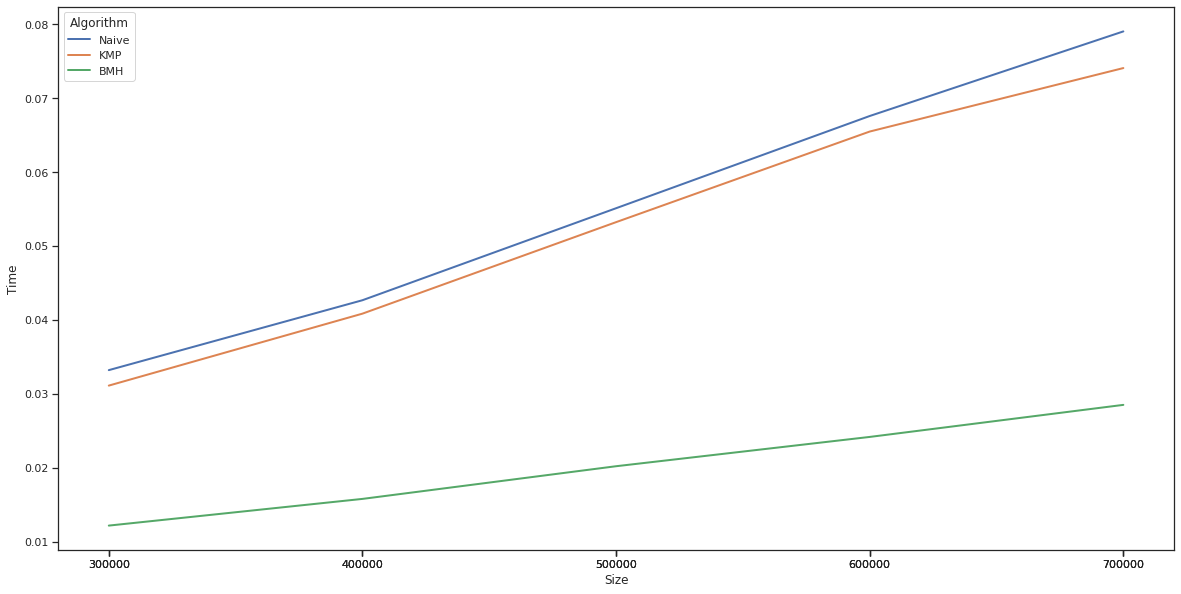

<Figure size 1440x720 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame.from_dict(mapSizeToTime, orient='index', columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

#Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

#Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

chart = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)

#plt.yscale('log')
fig = plt.figure()
chart.set(xticks=[i for i in df.Size])
plt.show()

In [ ]:
import time
import string
import random
import math

#defines the number of times each algorithm will be processed to obtain the average time
num_rounds = 100

SEQUENCE_LENGTH = 0.1
DR = dict()
#calculates the executions average time
def avgTime(func, size, debug=True):
  t = 0
  for i in range(num_rounds):  
    random.seed(size+i)  
    T  = "".join( [random.choice(string.digits) for i in range(size)] )      
    #T  = "".join( [random.choice(string.ascii_letters) for i in range(size)] )
    start = random.randint(1, size)
    end = min(start + int(size*SEQUENCE_LENGTH+1), size)
    S  = T[start:end]

    start = time.time()
    p = func(T,S)
    end = time.time()    
    t += end - start

    if debug:  
      ##add the result or check if it is the same
      if (size,i) not in DR:
        DR[(size,i)] = (p,T,S)        
      else:             
        (sp,sT,sS) = DR[(size,i)]
        if p !=sp :
          print(f"1. S={DR[(size,i)][2]}, found={DR[(size,i)][0]} and T={DR[(size,i)][1]}")
          print(f"2. S={S}, found={p} and T={T} ")
          
        assert p == sp
      
  return t/num_rounds


#defines the algorithms to be processed
algorithms = [Naive,KMP,BMH]

#sizes = [300000,350000,400000,450000,500000]
sizes = [100000,200000,300000,400000,500000]

mapSizeToTime = dict()
for i in range(len(sizes)):
  print(f"Starting collect {i+1}")
  
  #map list size to algorithm average time
  for algorithm in algorithms:
    print('  > ', algorithm.__name__)  
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avgTime(algorithm, sizes[i], True)
  print("")

print(f"Finish data collection")

Starting collect 1
  >  Naive
  >  KMP
  >  BMH

Starting collect 2
  >  Naive
  >  KMP
  >  BMH

Starting collect 3
  >  Naive
  >  KMP
  >  BMH

Starting collect 4
  >  Naive
  >  KMP
  >  BMH

Starting collect 5
  >  Naive
  >  KMP
  >  BMH

Finish data collection


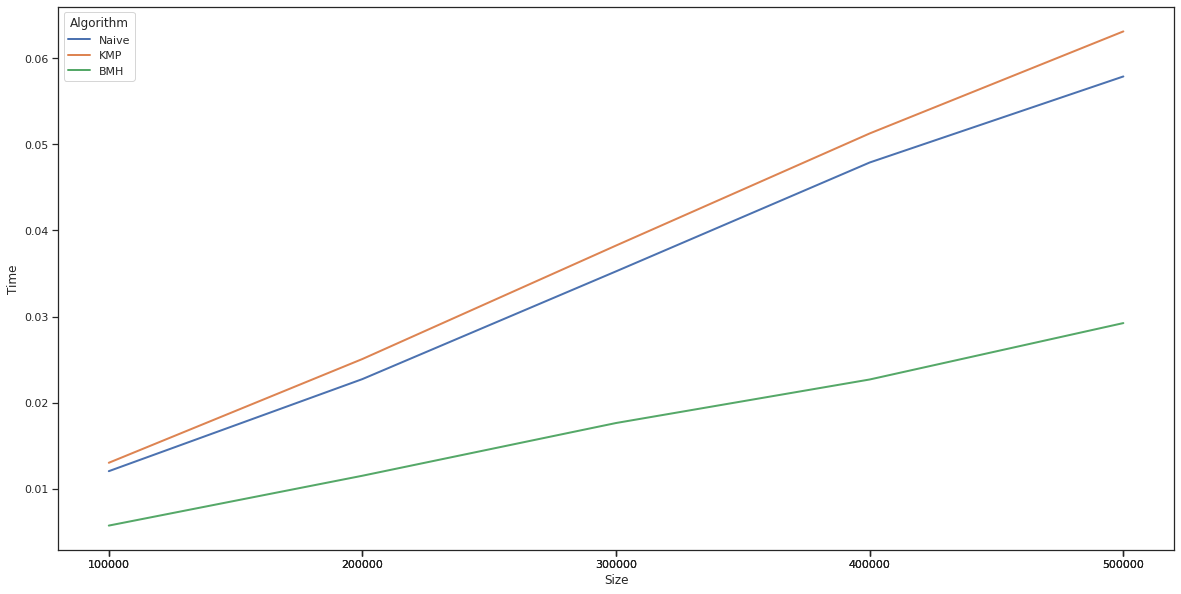

<Figure size 1440x720 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame.from_dict(mapSizeToTime, orient='index', columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

#Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

#Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

chart = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)

#plt.yscale('log')
fig = plt.figure()
chart.set(xticks=[i for i in df.Size])
plt.show()